# **Practica 8**

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt

## 1. Monte Carlo Markov Chain

The aim of this practice is to learn how to sample from a posterior distribution using MCMC with the Metropolis-Hastings algorithm. More specifically, in this session you will code your first MCMC algorithm to sample from an univariate distribution.

Let us focus on sampling from an univariate distribution, i.e. that has a single parameter, and use a standard Gaussian proposal distribution $q(\theta'|\theta)$. The MCMC function we want to write should take four arguments:

1. a function that can evaluate the target distribution at any value of its parameter

2. an initial value for the parameter

3. the standard deviation of the (Gaussian) proposal distribution $\sigma_D$ (i.e., the average step size of the sampler)

4. the number of iterations for which to run the sampler.

The MCMC function should evaluate the target distribution at the given initial parameter value, and then apply the Metropolis-Hastings algorithm for the specified number of iterations.

**Detailed Instruction for defining the MCMC sampler.**

1. Evaluate the function "target" at parameter value "init_theta". (use a value a bit far from the center of the target distribution in order to see the burn-in process)

2. Initialize variables to store the current value of theta, the vector of samples, and the Number of accepted proposal

3. repeat n_iterations times:

    (a) draw a new theta from the (Gaussian) proposal distribution with standard deviation $\sigma_D$. In fact it is recommended to evaluate the varaince of the target distribution to choose the step size of the sample.
    In our case we already know it and that is the reason why you use the same standard deviation.

    (b) evaluate the function "target" at the proposed theta

    (c) calculate the Metropolis-Hastings ratio

    (d) draw a uniform random number between 0 and 1.

    (e) accept or reject by comparing the random number to the Metropolis-Hastings ratio (acceptance probability)

    (f) if accept, change the current value of theta to the proposed theta update the current value of the target and keep track of the number of accepted proposals

    (g) add the current theta to the vector of samples

4. return the trace of the chain (i.e., the vector of samples)

In [2]:
# target: target function
# init_theta: initial value of the parameter
# std: standar deviation of the distribution
# n_iterations: number of iterations
def MCMC(target, init_theta, std, n_iterations):
# Arrays to store cuantities
    samples = list()
    n = 0
    while n < n_iterations:
# Evaluation of initial value
        xi = target(init_theta)
# Choose a new theta
        theta = init_theta + np.random.normal(0, std)
# Evaluate target function
        x = target(theta)
# Metropolis-Hastings ratio
        alpha = x/xi
# Generate a uniform random number between 0 and 1
        random = np.random.uniform(0,1)
# Accept if random <= alpha
        if random <= alpha:
# Add a count
            n+=1
# Save the value
            samples.append(theta)
# Update the value
            init_theta = theta
    return samples

## 2. Gelman-Rubin convergence

You will use the code you just develop in order to generate various walkers (different chains starting from random positions).

1. Create a void list in which you will save the different chains from the different walkers. list_res = []

In [3]:
list_res = []

2. Run 10 chains that will finish when you accept 500 steps and save the 10 chains in the list.

In [4]:
# A gaussian distribution with mean = 5 and std = 1
mean_ = 5
std_ = 1
def gauss_target(x):
    return np.exp(-(x - mean_)**2 / (2*(std_**2)))/(np.sqrt(2*np.pi*(std_**2)))

Text(0.5, 1.0, '10 chains')

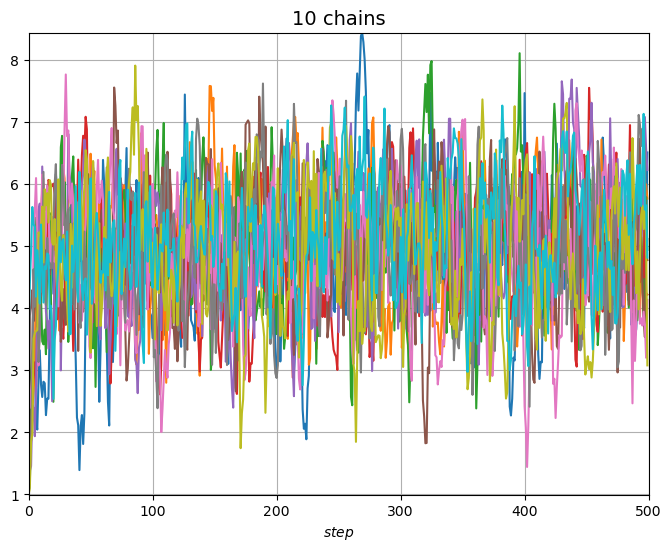

In [5]:
# For 10 chains
for i in range(10):
    chain10 = MCMC(gauss_target, 1, 1, 500)
    list_res.append(chain10)
# Plots
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(list_res[i])
plt.xlim(0,500)
plt.ylim(np.min(list_res),np.max(list_res))
plt.xlabel('$step$')
plt.grid()
plt.title('10 chains', size=14)

Text(0.5, 1.0, '1 chain')

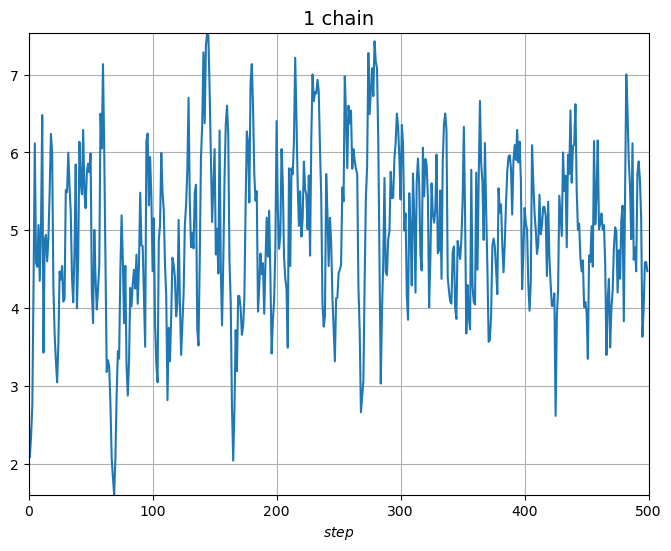

In [6]:
# For just one chain
chain1 = MCMC(gauss_target, 1, 1, 500)
# Plots
plt.figure(figsize=(8, 6))
plt.plot(chain1)
plt.xlim(0,500)
plt.ylim(min(chain1),max(chain1))
plt.xlabel('$step$')
plt.grid()
plt.title('1 chain', size=14)

3. Create a function that take in argument list of the chains and compute the Gelman-Rubin convergence estimator. You can follow these instructions in order to do it:

    • Evaluate the position on the middle of your chains, you will burn the first half, so use only the second half.

    • Create 2 arrays that will contain the mean and variance of each chain arr_mean and arr_var. (so the size is equal to M = len(list_res))

    • Evaluate for each chain (using only the second half) the individual mean $\hat{\theta}_m = \frac{1}{N}\sum_i^N\theta_m^i$ and then the individual variance $\sigma_m^2 = \frac{1}{N-1}\sum_i^N(\theta_m^i-\hat{\theta}_m)^2$ where $\theta_m^i$ are the values from your $m^{th}$ chain. Save the results in the 2 arrays you defined the point before.

    • Evaluate the global mean of the chains $\hat{\theta} = \frac{1}{M}\sum_{m=1}^M\hat{\theta}_m$

    • Evaluate the variance of the individual means around the global mean $B = \frac{N}{M-1}\sum_{m}^M(\hat{\theta}_m-\hat{\theta})^2$

    • Evaluate the averaged variance of the chains $W = \frac{1}{M}\sum^M_{m=1}\sigma_m^2$

    • Evaluate the unbiased variance estimator $\hat{V} = \frac{N-1}{N}W + \frac{M+1}{M\times N}B$

    • Finaly you can calculate the $R$ factor $R = \sqrt{\hat{V}/W}$ that will asymptotically tend to 1 as the chain converge. Return this value

In [7]:
# Definition of the Gelman-Rubin estimator
def Gelman_Rubin(lista):
    list_res=list()
# Burn the first half of the chains
    for i in range(len(lista)):
        list_res.append(lista[i][250:])
# Mean and variance arrays
    M = len(list_res)
    N = len(list_res[5])
    arr_mean = [np.mean(list_res[i]) for i in range(M)]
    std_mean = [np.std(list_res[i]) for i in range(M)]
# Global mean
    mean_global = np.mean(list_res)
# Variance of the individual means around the global mean
    B = 0
    for i in range(M):
        B += N/(M-1)*((arr_mean[i] - mean_global)**2)
# Averaged variance of the chains
    W = np.mean(std_mean)
# Unbiased variance estimator
    V = (N-1)*W/N + (M+1)*B/(M*N)
# R factor
    R = np.sqrt(V/W)
    return R

4. Apply the Gelman-Rubin estimator on your list of chain and you computed.

In [8]:
# Gelman-Rubin estimator for 10 chains
GR10 = Gelman_Rubin(list_res)
print(f'The Gelman-Rubin estimator for the 10 chains is: {GR10}')

The Gelman-Rubin estimator for the 10 chains is: 1.0114402464696315


5. Generate now $M = 20$ chains of same size and apply the Gelman-Rubin estimator and compar with the one you obtained with $M = 10$

In [9]:
# For 20 chains
list_res20 = []
for i in range(20):
    chain20 = MCMC(gauss_target, -10, 5, 500)
    list_res20.append(chain20)
# Gelman-Rubin estimator for 20 chains
GR20 = Gelman_Rubin(list_res20)
print(f'The Gelman-Rubin estimator for the 20 chains is: {GR20}')

The Gelman-Rubin estimator for the 20 chains is: 1.0011015922124318


In [10]:
print(f'The comparison between the German-Rubin estimators for the 10 and 20 chains is: {GR20/GR10}, very close to 1')

The comparison between the German-Rubin estimators for the 10 and 20 chains is: 0.9897782846853423, very close to 1
